<div>
    <img src="assets/intro_page.png" />
</div>


<div>
    <img src="assets/team_info.png" />
</div>


<div>
    <img src="assets/eos-white-paper.png" height=100 width=600 />
</div>

#### Why optimizing scheduling of EOS is complex?

It is a complicated process because observing and downloading operations are both involved. There could be multiple constraints such as:  
* Energy constraints.
* Storage capacity constraints.
* Priority of targets.
* Camera cooling time.
* Downlink window time.
* Weather

#### Different ways to choose K targets based on constraints from N targets areas:

> - Total targets to be captured (N): **10**
> - Maximum number of Targets that can be captured (K): **4**
> - The number of combinations: **210**

> - Total targets to be captured (N): **1000**
> - Maximum number of Targets that can be captured (K): **40**
> - The number of combinations: **5.559 × 10<sup>71</sup>** = 555974423571664033815804589243553849851258056649719919687842027223208475


In [2]:
import pandas as pd
import json
import requests
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
excel_file = 'data/data-eos-5.xlsx'
eos_data_df = pd.read_excel(excel_file, nrows=1)

In [3]:
eos_data_df.head()

,Targets,Priorities,Size of Targets,Energies of Targets,Storage Limit of Satellites,Energy Limit of Satellites,Ground Stations,Limit of Ground Stations,Satellite 1,Satellite 2,Satellite 3
0,"['T18', 'T43', 'T10', 'T26', 'T36', 'T11', 'T4...","[30, 3, 9, 26, 14, 10, 29, 27, 2, 11, 24, 18, ...","[36, 20, 28, 14, 15, 16, 24, 12, 26, 18, 9, 22...","[26, 10, 23, 19, 9, 4, 14, 6, 11, 25, 1, 8, 2,...","[296, 318, 391]","[100, 151, 169]","['GS3', 'GS2', 'GS1']","[37, 38, 39]","[27, 25, 'GS1', 'GS2', 10, 'GS3', 37, 15, 35, ...","[40, 24, 30, 21, 43, 23, 11, 13, 32, 38, 37, 4...","[30, 'GS2', 20, 34, 14, 27, 41, 35, 42, 17, 10..."


In [4]:
input_json_array = []
for index, row in eos_data_df.iterrows():
    input_json_array.append({'Targets': row['Targets'], 'Priorities': row['Priorities'],
                             'Size of Targets': row['Size of Targets'], 
                             'Energies of Targets': row['Energies of Targets'],
                             'Storage Limit of Satellites': row['Storage Limit of Satellites'], 
                             'Energy Limit of Satellites': row['Energy Limit of Satellites'],
                             'Ground Stations': row['Ground Stations'], 
                             'Limit of Ground Stations': row['Limit of Ground Stations'],
                             'Satellite 1': row['Satellite 1'], 'Satellite 2': row['Satellite 2'],
                             'Satellite 3': row['Satellite 3']                            
                            })
input_json = json.dumps({"input_json": input_json_array})

In [5]:
response = requests.post("https://api.artificialbrain.tech/quantumOptimizeEOS", input_json, headers=headers)

In [13]:
eos_response = json.dumps(response.json(), indent=4)

In [41]:
print(eos_response)

{
    "Results": [
        {
            "Result": [
                "T15",
                "T14",
                "T29",
                "T27",
                "T24",
                "T13",
                "T36",
                "T44",
                "T26",
                "T22",
                "T39",
                "T38",
                "T31",
                "T20",
                "T41",
                "T35",
                "T12",
                "T21"
            ],
            "Total Priority": 431,
            "Execution Time": 8.514117240905762,
            "Satisfied all Constraints?": true,
            "Constraints Not Satisfied": [],
            "Targets for Satellite 1": [
                "T15",
                "T14",
                "T29",
                "T27"
            ],
            "Targets for Satellite 2": [
                "T24",
                "T13",
                "T36",
                "T44",
                "T26",
                "T22"
            ],
  

# Benchmarking Results

In [10]:
excel_file = 'data/results-eos-100-600.xlsx'
eos_benchmark_df = pd.read_excel(excel_file)

In [11]:
print("Mean of Total Priority \n")
print("Quantum", int(eos_benchmark_df["Total Priority (Quantum)"].mean()))
print("Simulated Annealing", int(eos_benchmark_df["Total Priority (Simulated Annealing)"].mean()))
print("Gurobi optimizer",int(eos_benchmark_df["Total Priority (Gurobi Optimizer)"].mean()))

Mean of Total Priority 

Quantum 34341
Simulated Annealing 15652
Gurobi optimizer 30343


In [12]:
print("Mean of Execution Time \n")
execution_time_quantum = eos_benchmark_df["Execution Time (Quantum)"].mean()
print("Quantum {:.2f}".format(eos_benchmark_df["Execution Time (Quantum)"].mean()))
print("Simulated Annealing {:.2f}".format(eos_benchmark_df["Execution Time (Simulated Annealing)"].mean()))
print("Gurobi optimizer {:.2f}".format(eos_benchmark_df["Execution Time (Gurobi Optimizer)"].mean()))

Mean of Execution Time 

Quantum 179491.24
Simulated Annealing 5335.14
Gurobi optimizer 274352.07


Quantum Results:


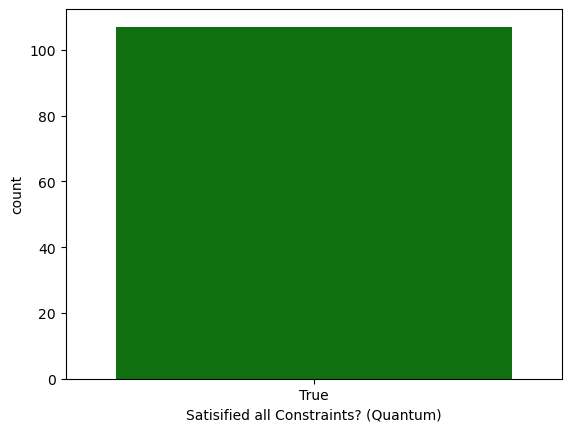

In [13]:
print('Quantum Results:')
eos_benchmark_df["Satisified all Constraints? (Quantum)"].value_counts()
sns.countplot(eos_benchmark_df['Satisified all Constraints? (Quantum)'], palette=['g']);

Simulated Annealing Results:


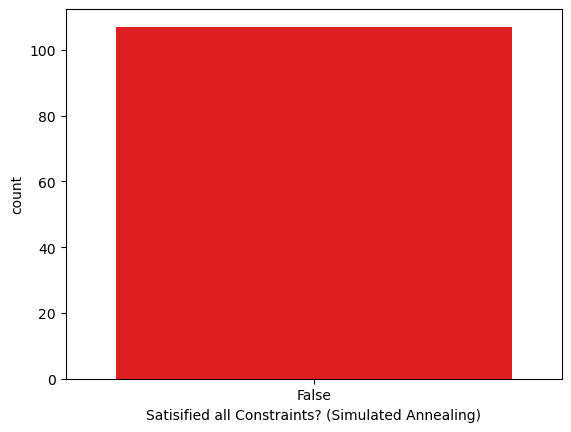

In [14]:
print('Simulated Annealing Results:')
eos_benchmark_df["Satisified all Constraints? (Simulated Annealing)"].value_counts()
sns.countplot(eos_benchmark_df['Satisified all Constraints? (Simulated Annealing)'], palette=['r', 'g']);

Gurobi Optimizer Results:


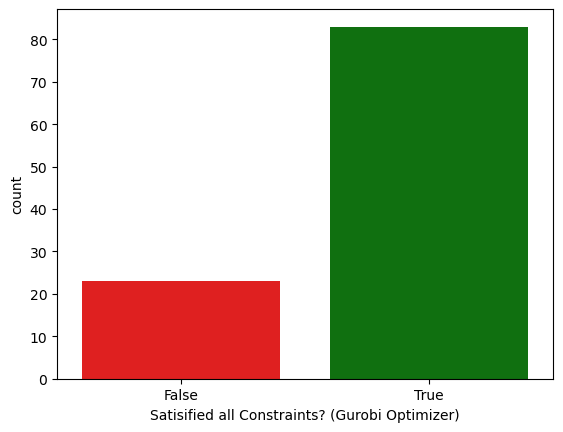

In [15]:
print('Gurobi Optimizer Results:')
eos_benchmark_df["Satisified all Constraints? (Gurobi Optimizer)"].value_counts()
sns.countplot(eos_benchmark_df['Satisified all Constraints? (Gurobi Optimizer)'], palette=['r', 'g']);

<div>
    <img src="assets/mars-paper.png" height=100 width=600 />
</div>

<div>
    <img src="assets/space-debris-white-paper.png" height=100 width=600 />
</div>
<div>
    <img src="assets/satellite-placement-white-paper.png" height=100 width=600 />
</div>